# Predicting salary based on position level with polynomial regression model

## Data Preprocessing

### Importing the libraries

In [1048]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing data

In [1049]:
data = pd.read_csv('./Position_Salaries.csv')
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [1050]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


### Spliting data into matrix of features and independent variable

In [1051]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
x[:, 0]

array(['Business Analyst', 'Junior Consultant', 'Senior Consultant',
       'Manager', 'Country Manager', 'Region Manager', 'Partner',
       'Senior Partner', 'C-level', 'CEO'], dtype=object)

In [1052]:
import plotly.express as px
core_fig = px.scatter(data, x="Level", y="Salary", color="Position")
core_fig.update_traces(marker_size=12)
core_fig

In [1053]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

core_fig = make_subplots(rows=1, cols=2)

core_fig.add_trace(go.Bar(x=x[:,0], y=y, marker=dict(color=x[:,1])), row=1, col=1)
core_fig.add_trace(go.Scatter(x=x[:,0], y=y, marker=dict(color=x[:, 1], colorbar=dict(title='Level', len=.9, y=0.43))), row=1, col=2)

core_fig.update_xaxes(title_text="position", row=1, col=1)
core_fig.update_xaxes(title_text="position", row=1, col=2)

core_fig.update_yaxes(title_text="Salary", row=1, col=1)
core_fig.update_yaxes(title_text="Salary", row=1, col=2)

In [1054]:
x = data.iloc[:, 1:-1].values
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


## Training the models


### Training the linear regression model

In [1055]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression()

### Training the polynomial regression model

In [1056]:
DEGREE_1 = 3 #@param{type:"slider", min:"1", max:15, step:1}
DEGREE_2 = 4 #@param{type:"slider", min:"1", max:15, step:1}



In [1057]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=DEGREE_1)
poly_2 = PolynomialFeatures(degree=DEGREE_2)
x_poly = poly.fit_transform(x)
x_poly_2 = poly_2.fit_transform(x)
x_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [1058]:
from sklearn.linear_model import LinearRegression

pol_reg = LinearRegression()
pol_reg_2 = LinearRegression()
pol_reg.fit(x_poly, y)
pol_reg_2.fit(x_poly_2, y)

LinearRegression()

In [1059]:
y_pred = lin_reg.predict(x)
y_pred_poly = pol_reg.predict(x_poly)
y_pred_poly_2 = pol_reg_2.predict(x_poly_2)
print(y_pred)
print(y_pred_poly)

[-114454.54545455  -33575.75757576   47303.03030303  128181.81818182
  209060.60606061  289939.39393939  370818.18181818  451696.96969697
  532575.75757576  613454.54545455]
[ 14902.09790211  78759.90675991  94960.37296037  88223.77622378
  83270.3962704  104820.51282052 177594.40559441 326312.35431236
 575694.63869463 950461.53846152]


## Model Evaluation

### visualising polynomial regression prediction and linear regression prediction

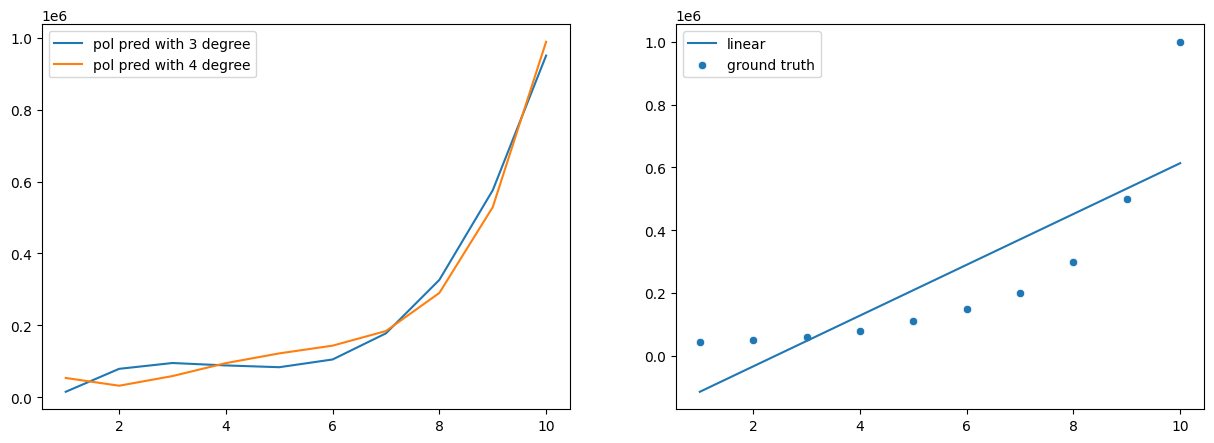

In [1060]:
# Visualising with Seaborn
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.lineplot(x=x[:, 0], y=y_pred_poly, ax=axes[0], label=f"pol pred with {DEGREE_1} degree")
sns.lineplot(x=x[:, 0], y=y_pred_poly_2, ax=axes[0], label=f"pol pred with {DEGREE_2} degree")
sns.lineplot(x=x[:, 0], y=y_pred, ax=axes[1], label="linear")
sns.scatterplot(x=x[:, 0], y=y, ax=axes[1], label='ground truth')
plt.show()

In [1061]:
# Make prediction smoother
x_grid = np.arange(min(x), max(x), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))

/tmp/ipython-input-553498143.py:2: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



In [1062]:
# Visualising with plotly
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(mode='lines+markers', x=x[:,0], y=y_pred_poly, name=f"pol pred with {DEGREE_1} degree"))
fig.add_trace(go.Scatter(mode='lines+markers', x=x[:,0], y=y_pred_poly_2, name=f"pol pred with {DEGREE_2} degree"))
fig.add_trace(go.Scatter(mode='lines', x=x_grid[:,0], y=pol_reg.predict(poly.fit_transform(x_grid)), name=f"pol pred with {DEGREE_1} degree smooth"))
fig.add_trace(go.Scatter(mode='lines', x=x_grid[:,0], y=pol_reg_2.predict(poly_2.fit_transform(x_grid)), name=f"pol pred with {DEGREE_2} degree smooth"))
fig.add_trace(go.Scatter(mode='lines+markers', x=x[:,0], y=y_pred, name="linear prediction"))
fig.add_trace(go.Scatter(mode='markers', x=x[:,0], y=y, name="ground truth"))
fig.show()

### Evaluating with metrics

In [1063]:
from sklearn.metrics import r2_score
linear_accuracy = r2_score(y_pred, y)
polynomial_accuracy = r2_score(y_pred_poly, y)
polynomial_accuracy_2 = r2_score(y_pred_poly_2, y)
print(linear_accuracy)
print(polynomial_accuracy)
print(polynomial_accuracy_2)

0.5053238120653423
0.9808499387901425
0.9973854712356893


In [1064]:
compar_acc = [linear_accuracy, polynomial_accuracy, polynomial_accuracy_2]

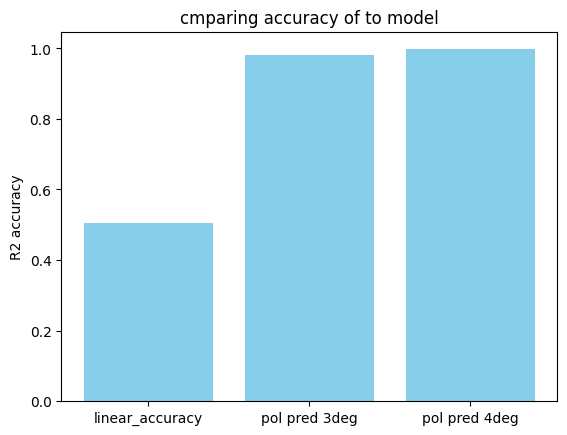

In [1065]:
# Plotting the results
plt.bar(x=["linear_accuracy", f"pol pred {DEGREE_1}deg", f"pol pred {DEGREE_2}deg"], height=compar_acc, color="skyblue")
plt.title("cmparing accuracy of to model")
plt.ylabel("R2 accuracy")
plt.show()

## Prediction with single value

In [1066]:
# predicting with linear regression
lin_reg.predict([[6.5]])

array([330378.78787879])

In [1067]:
# predicting with polynomial regression
pol_reg_2.predict(poly_2.fit_transform([[6.5]]))

array([158862.45265155])

In [1068]:
# Getting constants of the model
print(pol_reg_2.coef_)
print(pol_reg_2.intercept_)

[      0.         -211002.33100292   94765.44289063  -15463.28671331
     890.15151515]
184166.66666719783
